# Thompson model

import the data set and libary

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
print(dataset)

      Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
9995     0     0     1     0     0     0     0     1     0      0
9996     0     0     0     0     0     0     0     0     0      0
9997     0     0     0     0     0     0     0     0     0      0
9998     1     0     0     0     0     0     0     1     0      0
9999     0     1     0     0     0     0     0     0     0      0

[10000 rows x 10 columns]


implementing the thompson

In [9]:
import random
N = 1000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] *d
numbers_of_rewards_0 = [0] *d
total_reward = 0
for n in range(1 ,N):
    ad = 0
    max_random = 0
    for i in range (0,d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] +1 , 
                                      numbers_of_rewards_0[i] +1  )
        if(random_beta > max_random ):
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n,ad]
    if (reward == 1):
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward
    

visualizing the result

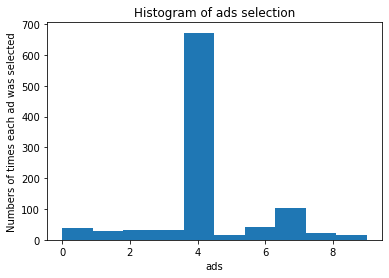

In [10]:
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('ads')
plt.ylabel('Numbers of times each ad was selected')
plt.show()